In [1]:
# Basic
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dtreeviz.trees import *

#  preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression

#  model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



# extras
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('marketing_campaign.csv',parse_dates=['Dt_Customer'],sep='\t')

##  1.Basic analysis

In [3]:
df.shape

(2240, 29)

In [4]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1468,7196,1950,PhD,Married,41145.0,1,1,2014-08-02,20,9,0,3,0,0,1,1,0,0,3,3,0,0,0,0,0,0,3,11,0
1776,7433,1985,Graduation,Single,29760.0,1,0,2012-08-29,87,64,4,68,7,5,17,4,3,1,4,8,0,0,0,0,0,0,3,11,0
1614,6215,1977,Graduation,Married,31353.0,1,1,2013-12-29,24,10,0,10,3,1,7,2,1,1,2,8,0,0,0,0,0,0,3,11,1
1448,1232,1982,PhD,Together,70038.0,0,0,2013-10-25,54,587,54,348,71,54,130,1,4,4,8,2,0,0,0,0,0,0,3,11,0
314,3050,1966,Graduation,Married,54198.0,1,1,2013-12-17,13,185,0,28,3,2,17,6,3,1,6,4,0,0,0,0,0,0,3,11,0


In [5]:
backup = df[['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']]

In [6]:
new_df = df[['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']]

In [7]:
new_df.reset_index(drop=True, inplace=True,)

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [9]:
new_df.duplicated().sum()

182

In [10]:
new_df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [11]:
new_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
new_df.corr()['Response']

Year_Birth             0.021325
Income                 0.133047
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
MntWines               0.247254
MntFruits              0.125289
MntMeatProducts        0.236335
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntGoldProds           0.139850
NumDealsPurchases      0.002238
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
NumStorePurchases      0.039363
AcceptedCmp3           0.254258
AcceptedCmp4           0.177019
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp2           0.169293
Complain              -0.001707
Response               1.000000
Name: Response, dtype: float64

In [13]:
new_df.cov()['Response']

Year_Birth                0.091050
Income                 1197.059729
Kidhome                  -0.015347
Teenhome                 -0.029963
Recency                  -2.047580
MntWines                 29.650947
MntFruits                 1.775370
MntMeatProducts          19.005226
MntFishProducts           2.166816
MntSweetProducts          1.726206
MntGoldProds              2.599238
NumDealsPurchases         0.001541
NumWebPurchases           0.147240
NumCatalogPurchases       0.229957
NumStorePurchases         0.045592
AcceptedCmp3              0.023535
AcceptedCmp4              0.016569
AcceptedCmp5              0.030235
AcceptedCmp1              0.025694
AcceptedCmp2              0.006935
Complain                 -0.000059
Response                  0.126931
Name: Response, dtype: float64

## 2.Cleaning

In [14]:
# Removing duplicated data
new_df.drop_duplicates(keep='first', inplace=True)
new_df.reset_index(drop=True, inplace=True,)

# concatinating Kidhome and Teenhome as children feature
new_df['Childrens'] = new_df['Kidhome'] + new_df['Teenhome']
new_df.drop(labels=['Kidhome','Teenhome'],axis=1, inplace=True, errors='raise')

In [15]:
new_df.shape

(2058, 23)

## 3.EDA 

###  3.1.Univariant analysis 

In [16]:
def classifyFeatures(df):
    numericFeatures = []
    categoricalFeatures = []
    otherFeatures = []

    for feature in df.columns:
        if df[feature].dtype == 'float64' or df[feature].dtype == 'int64':
            numericFeatures.append(feature)
        elif df[feature].dtype == 'object' or df[feature].dtype == 'bool':
            categoricalFeatures.append(feature)
        else:
            otherFeatures.append(feature)
    return {'numericFeatures':numericFeatures,'categoricalFeatures':categoricalFeatures,'otherFeatures':otherFeatures}  

numericFeatures,categoricalFeatures,otherFeatures = classifyFeatures(df).values()

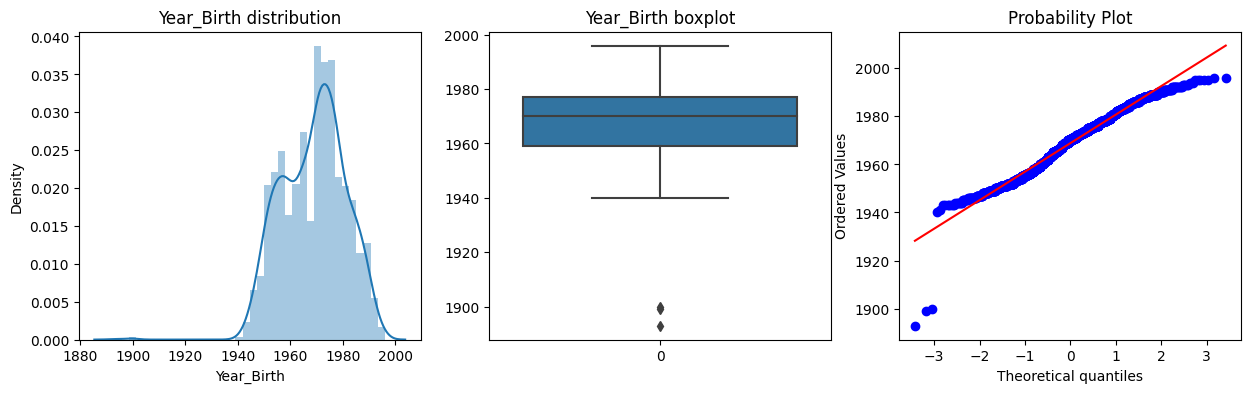

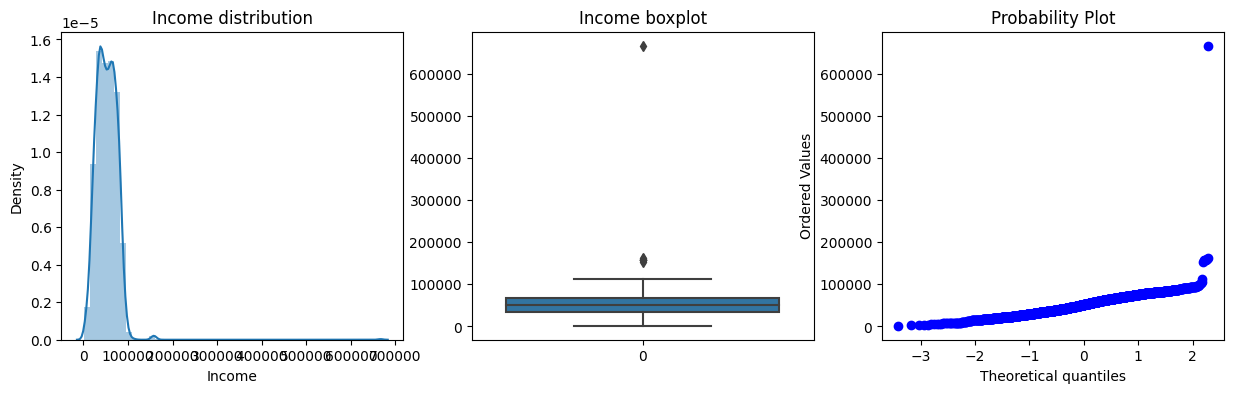

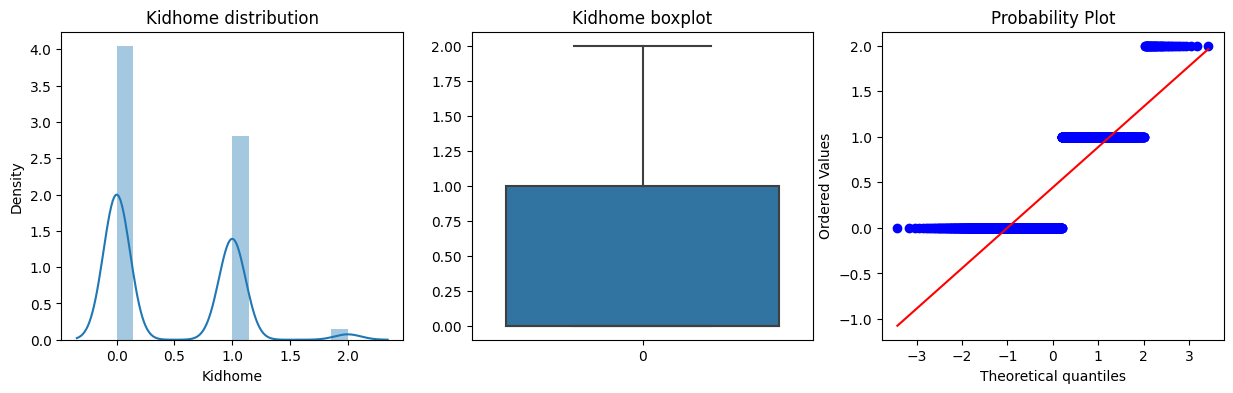

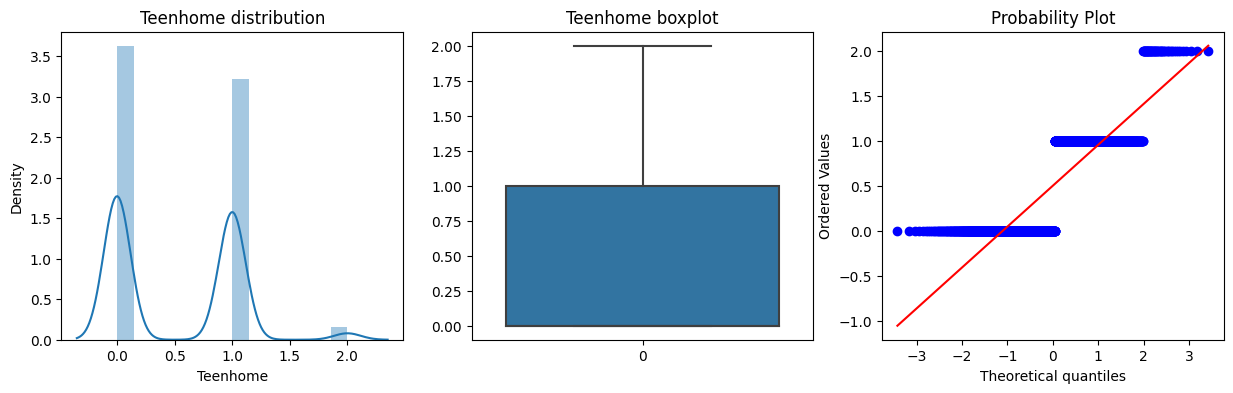

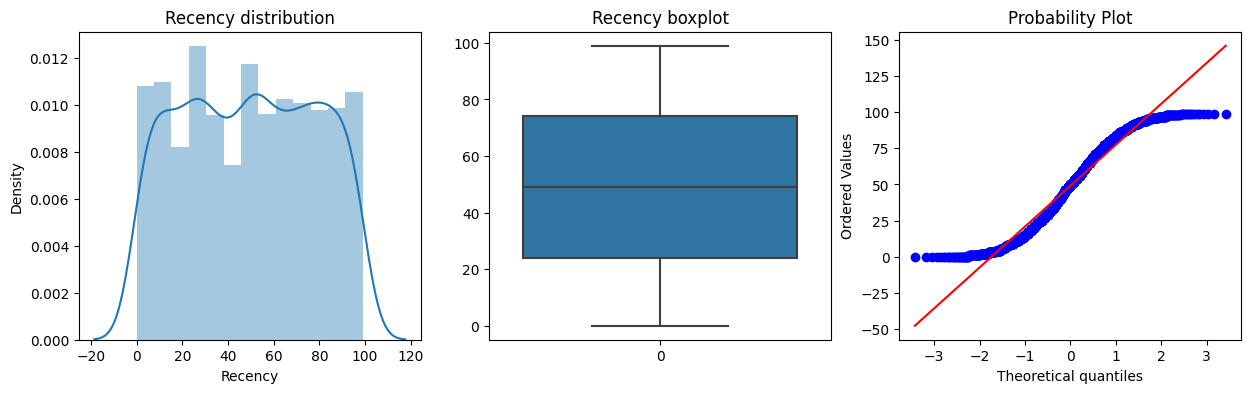

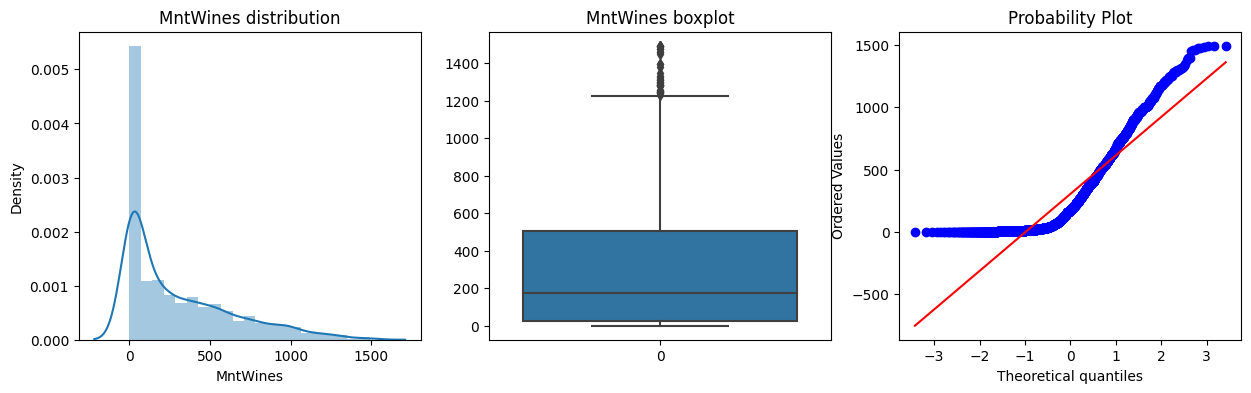

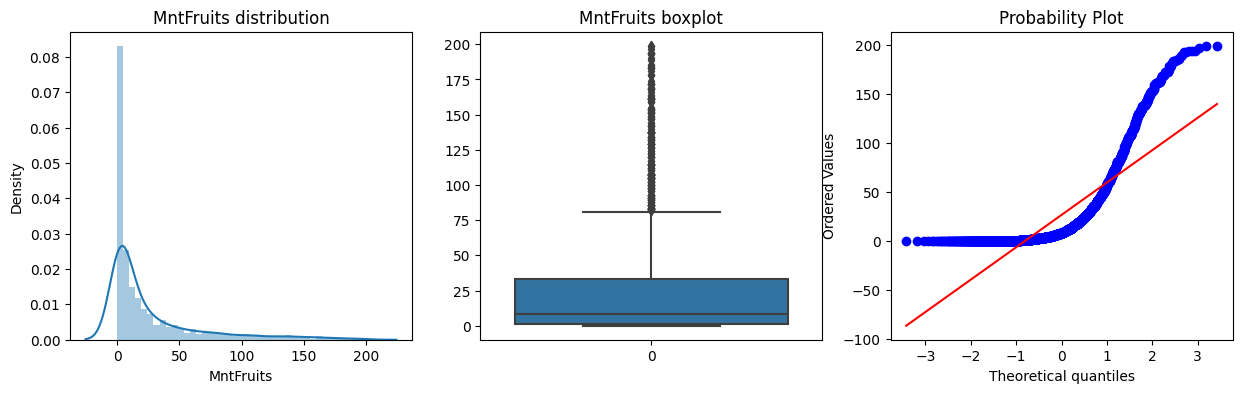

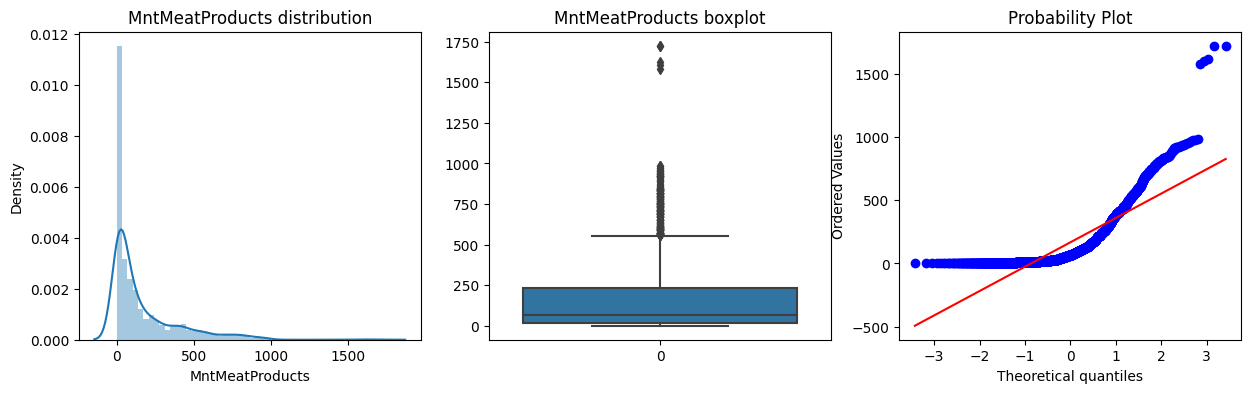

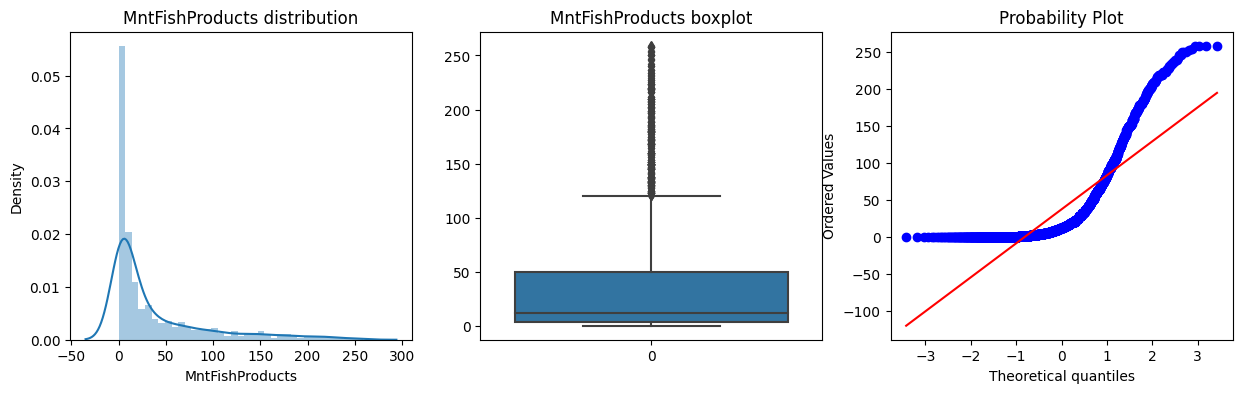

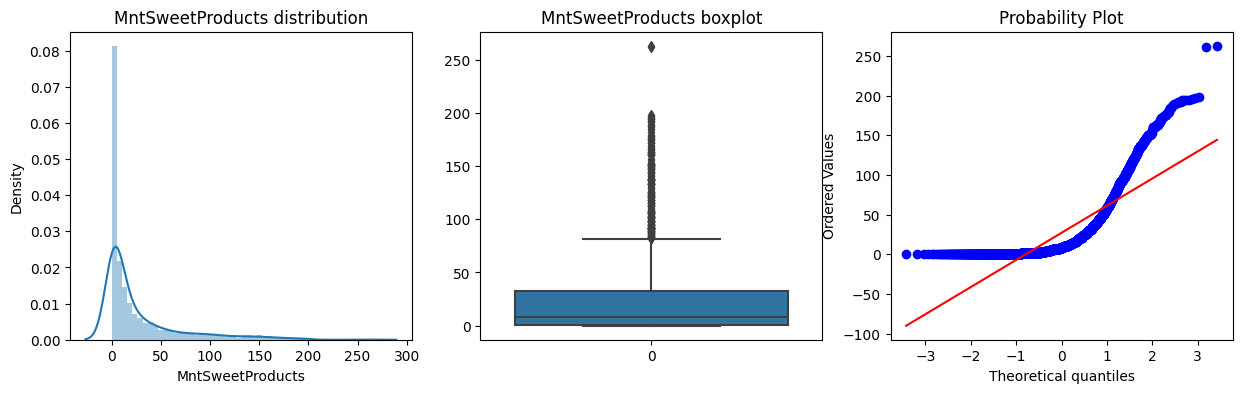

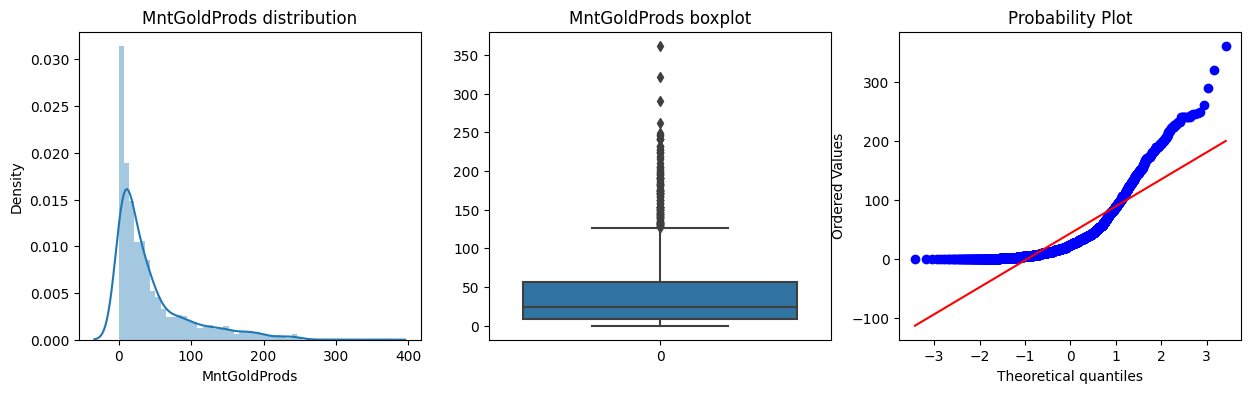

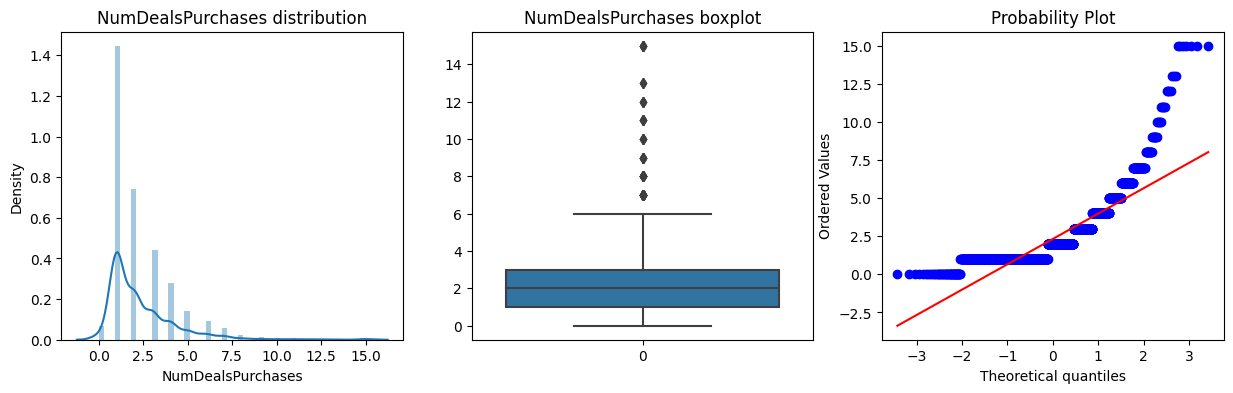

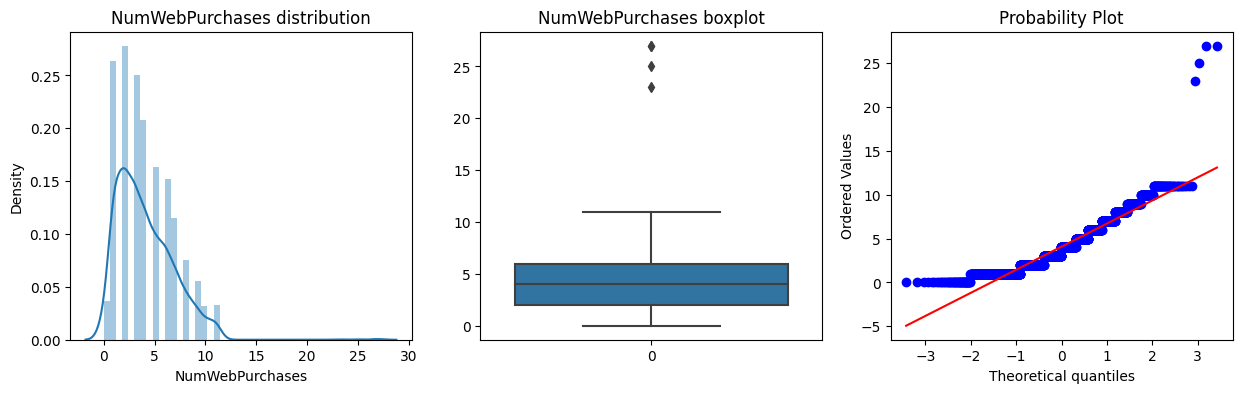

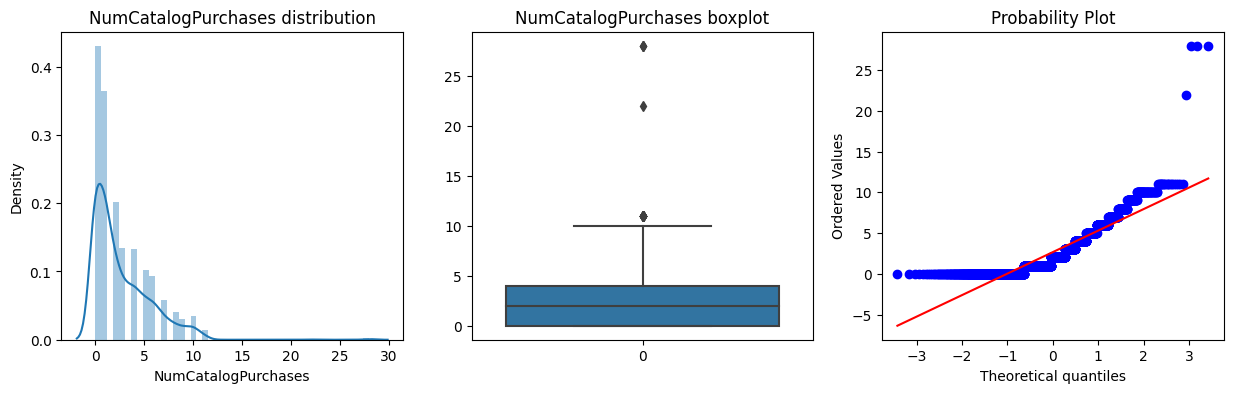

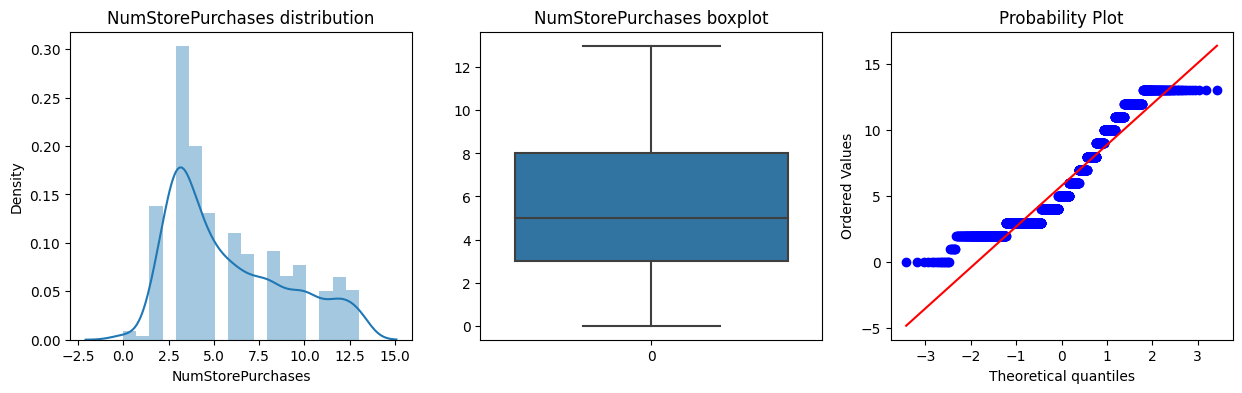

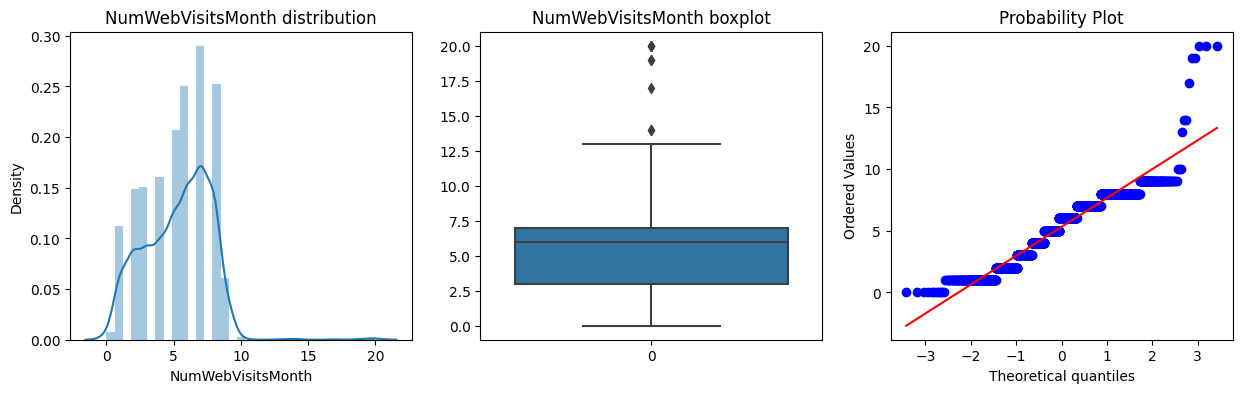

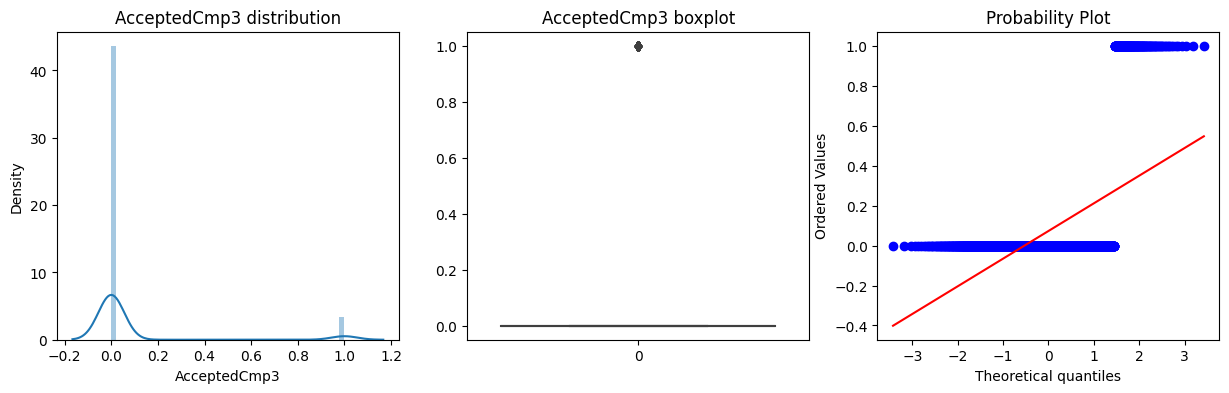

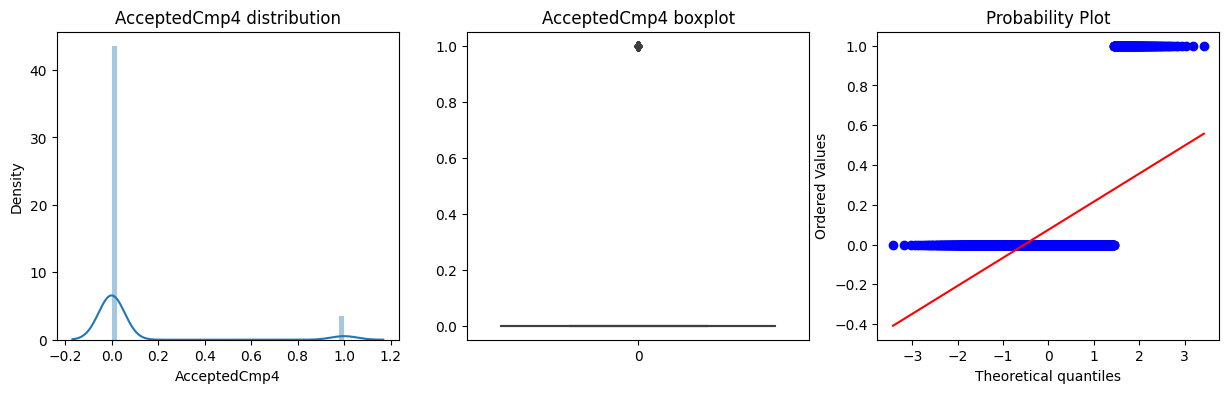

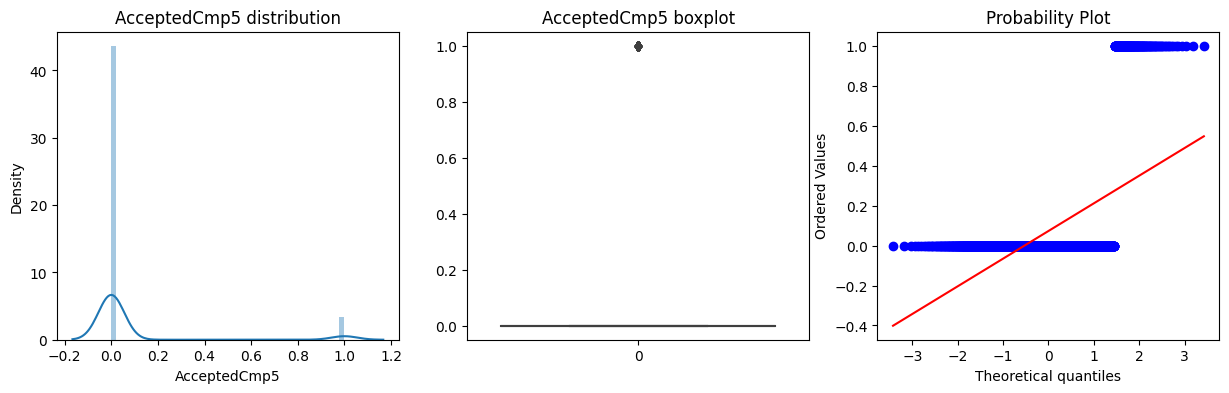

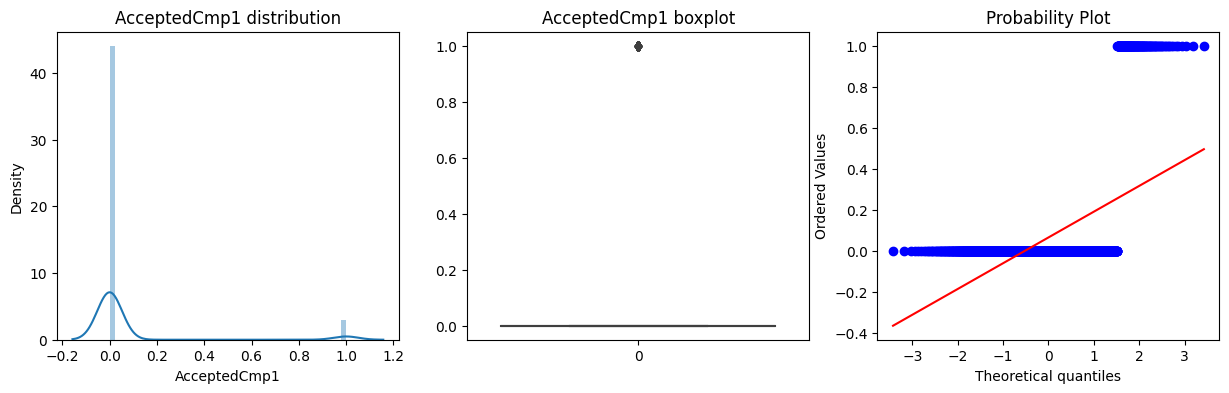

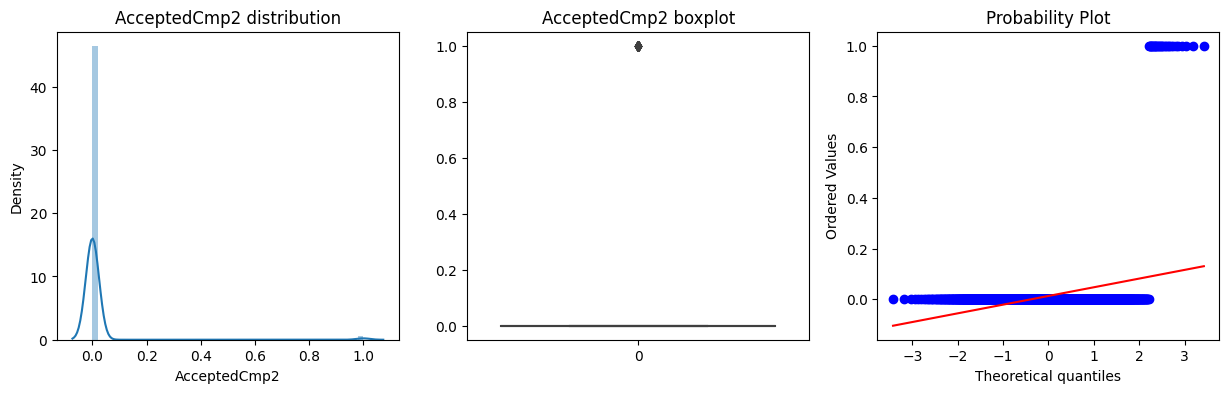

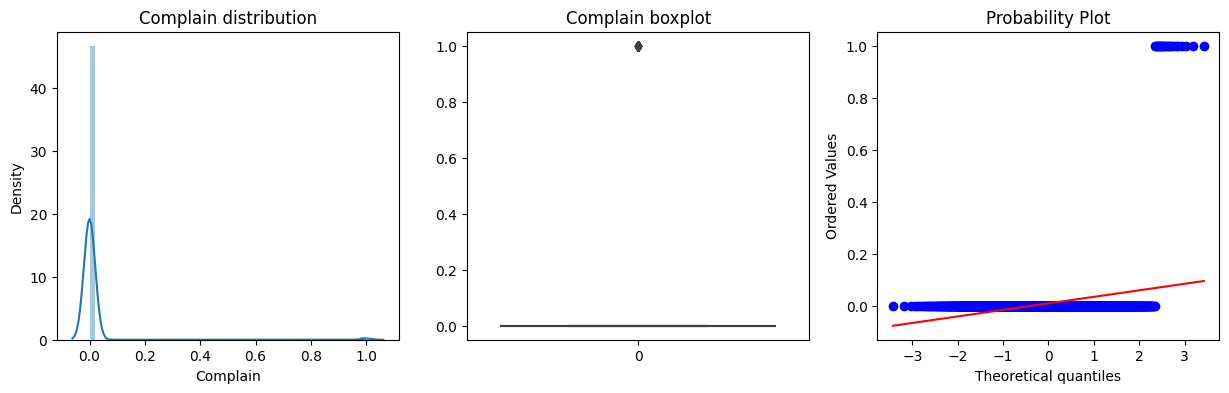

In [17]:
for feature in [feature for feature in numericFeatures if feature not in ['ID','Z_CostContact','Z_Revenue','Response']]:
    fig, ax = plt.subplots(1,3, figsize=(15,4))
    
    sns.distplot(df[feature],ax=ax[0]).set(title=f'{feature} distribution')
    
    sns.boxplot(df[feature],ax=ax[1]).set(title=f'{feature} boxplot')
    
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()
    

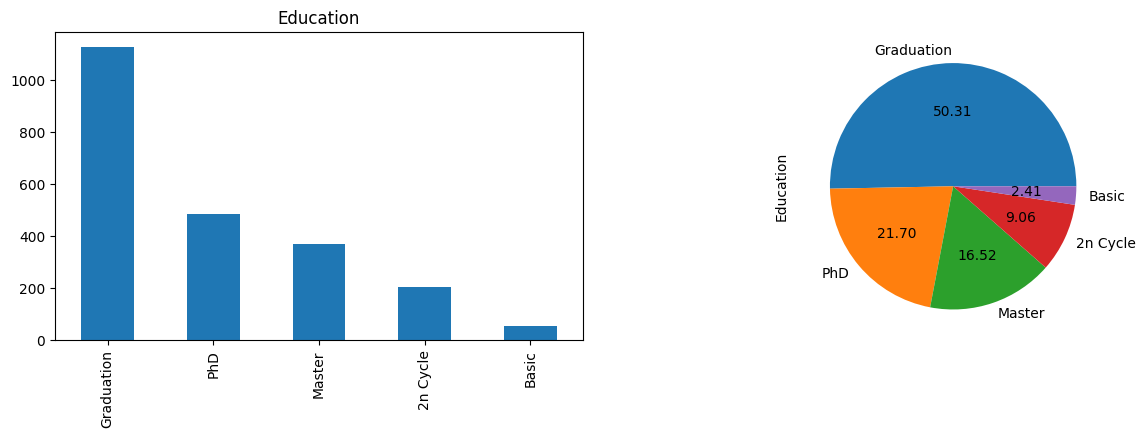

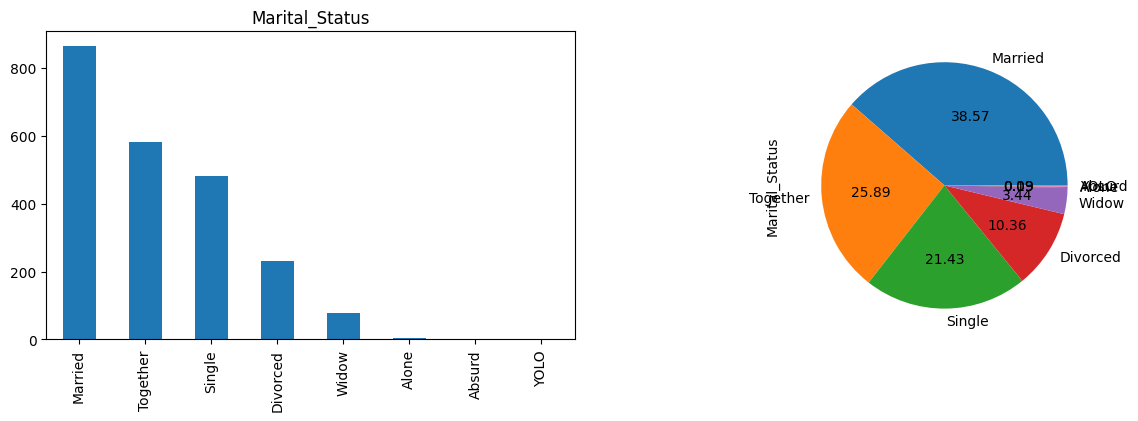

In [18]:
for feature in categoricalFeatures:
    fig, ax = plt.subplots(1,2, figsize=(15,4))
    df[feature].value_counts().plot(kind='bar',ax = ax[0], subplots=True)
    
    df[feature].value_counts().plot(kind='pie',autopct='%.2f',ax = ax[1], subplots=True)
    
    plt.show()

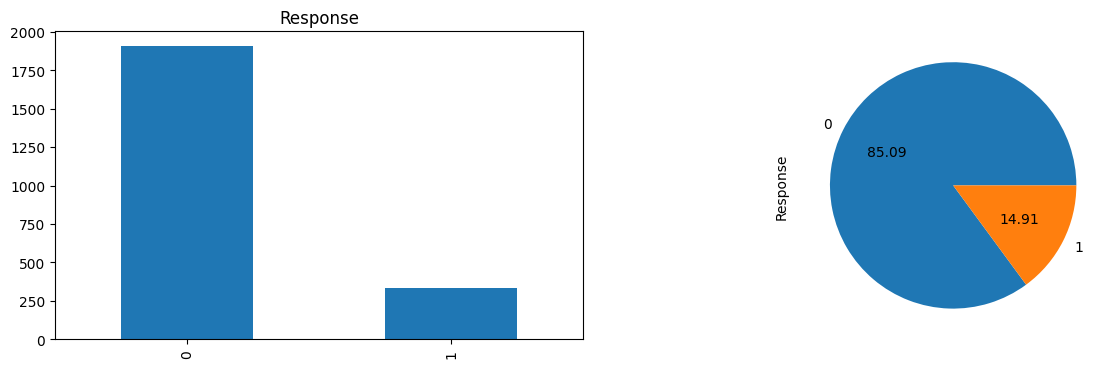

In [19]:
# Target column imbalanced data
fig, ax = plt.subplots(1,2, figsize=(15,4))
df['Response'].value_counts().plot(kind='bar',ax = ax[0], subplots=True)
df['Response'].value_counts().plot(kind='pie',autopct='%.2f',ax = ax[1], subplots=True)
plt.show()

### 3.2.Multi-variant analysis

<AxesSubplot: xlabel='Income', ylabel='Year_Birth'>

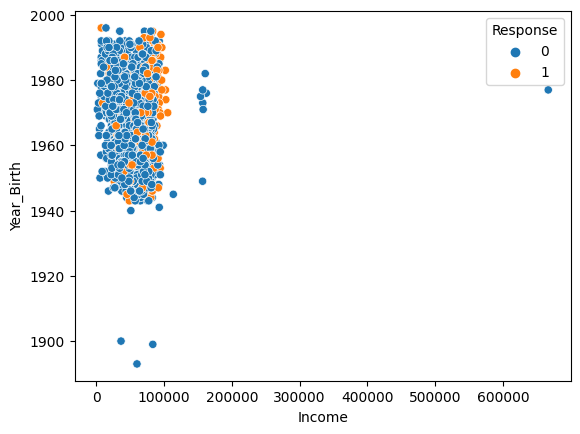

In [20]:
sns.scatterplot(data=df,x=df['Income'],y=df['Year_Birth'],hue=df['Response'])

<AxesSubplot: xlabel='Education', ylabel='Income'>

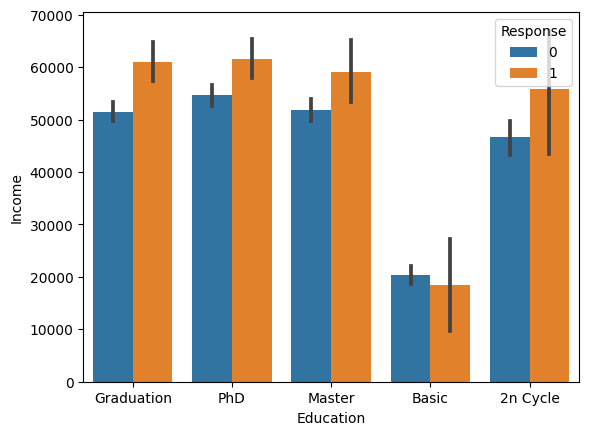

In [21]:
sns.barplot(data=df,x=df['Education'],y=df['Income'],hue=df['Response'])

<AxesSubplot: xlabel='Education', ylabel='Income'>

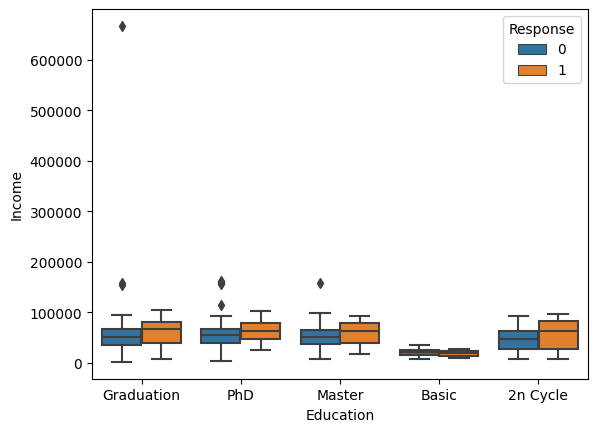

In [22]:
sns.boxplot(data=df, x=df['Education'], y=df['Income'], hue=df['Response'])

<AxesSubplot: ylabel='Income'>

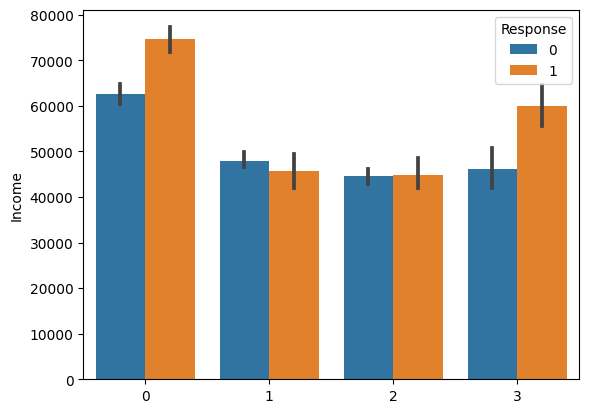

In [23]:
sns.barplot(data=df,x=df['Teenhome']+df['Kidhome'],y=df['Income'],hue=df['Response'])

<AxesSubplot: ylabel='Income'>

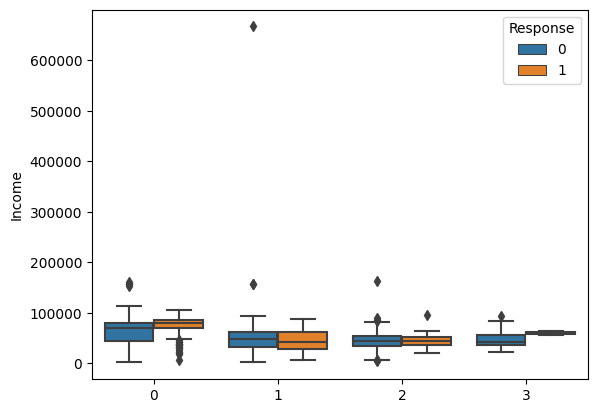

In [24]:
sns.boxplot(data=df, x=df['Teenhome']+df['Kidhome'], y=df['Income'], hue=df['Response'])

<AxesSubplot: xlabel='Marital_Status', ylabel='Income'>

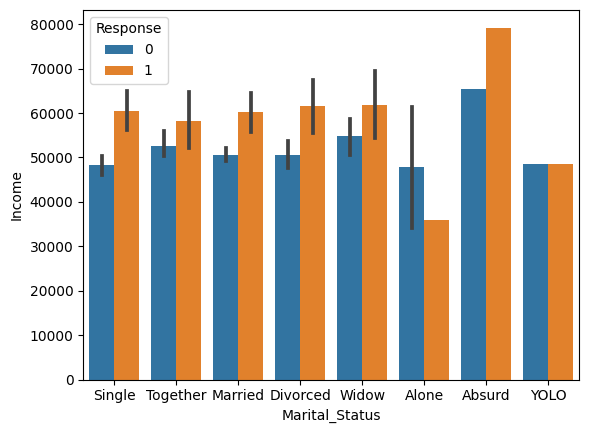

In [25]:
sns.barplot(data=df,x=df['Marital_Status'],y=df['Income'],hue=df['Response'])

<AxesSubplot: xlabel='Marital_Status', ylabel='Income'>

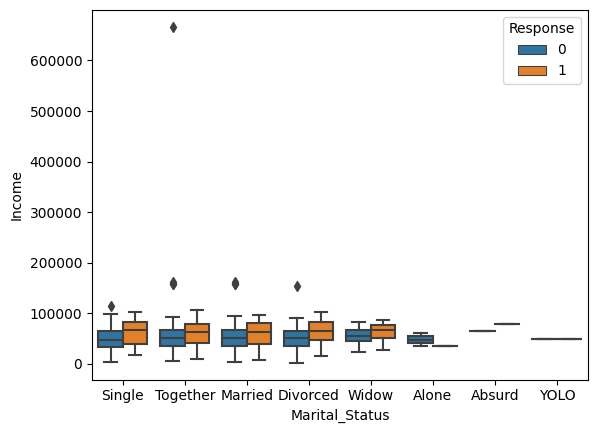

In [26]:
sns.boxplot(data=df, x=df['Marital_Status'], y=df['Income'], hue=df['Response'])

<AxesSubplot: xlabel='Income', ylabel='Density'>

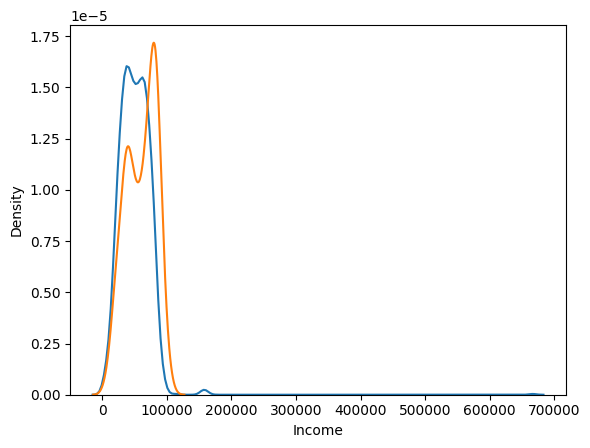

In [27]:
sns.distplot(df[df['Response']==0]['Income'],hist=False)
sns.distplot(df[df['Response']==1]['Income'],hist=False)

<AxesSubplot: xlabel='Recency', ylabel='Density'>

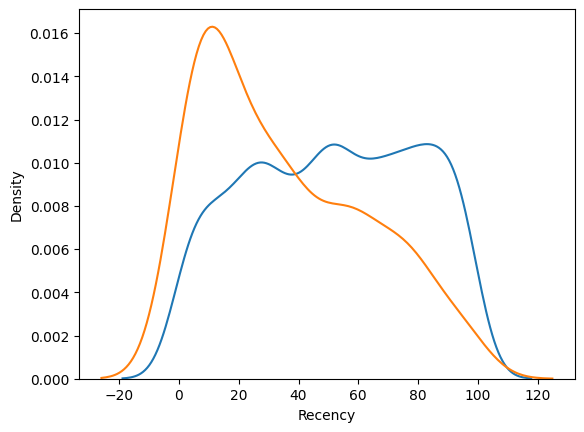

In [28]:
sns.distplot(df[df['Response']==0]['Recency'],hist=False)
sns.distplot(df[df['Response']==1]['Recency'],hist=False)

<AxesSubplot: xlabel='Year_Birth', ylabel='Density'>

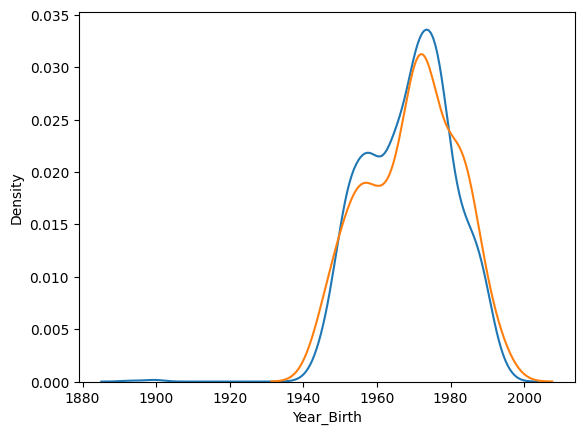

In [29]:
sns.distplot(df[df['Response']==0]['Year_Birth'],hist=False)
sns.distplot(df[df['Response']==1]['Year_Birth'],hist=False)

<AxesSubplot: xlabel='Response', ylabel='Education'>

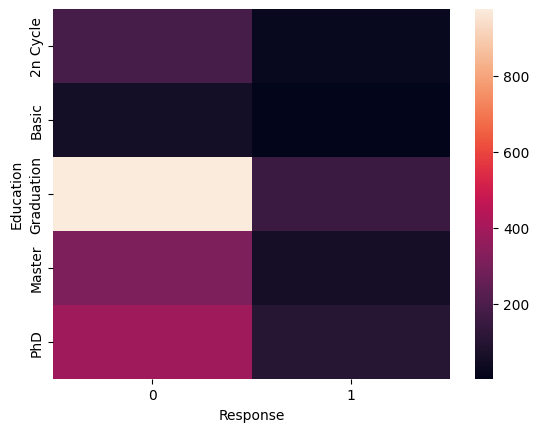

In [30]:
sns.heatmap(pd.crosstab(df['Education'],df['Response']))

<AxesSubplot: xlabel='Response', ylabel='Marital_Status'>

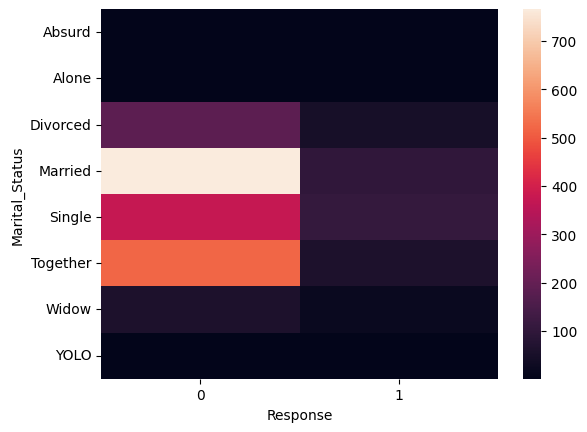

In [31]:
sns.heatmap(pd.crosstab(df['Marital_Status'],df['Response']))

<AxesSubplot: xlabel='Response', ylabel='row_0'>

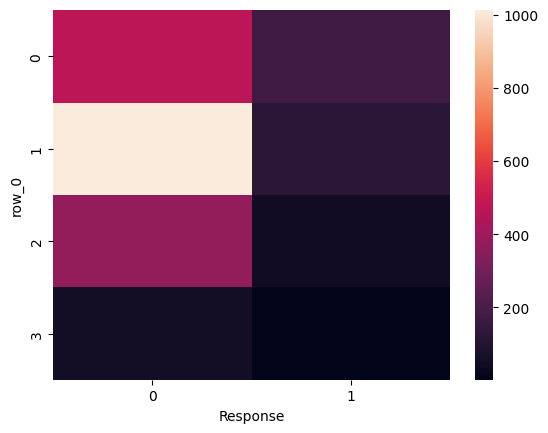

In [32]:
sns.heatmap(pd.crosstab(df['Teenhome']+df['Kidhome'],df['Response']))

## 4.PreProcessing

### 4.1.Pre processing plain

- Income null value handling
- skweness in data variable transformation
- Outlier handling
- scaling 
- encoding of categorical data both one hot and ordinal encoding


In [33]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(new_df.drop(columns=['Response']),
                                                 new_df['Response'],
                                                 test_size=0.2,
                                                random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1646, 22), (412, 22), (1646,), (412,))

In [34]:
X_train.sample(5)

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Childrens
979,1951,Master,Married,59412.0,56,90,67,165,30,43,11,1,4,2,8,0,0,0,0,0,0,0
1071,1973,PhD,Single,54466.0,78,12,0,4,0,0,0,1,1,0,2,0,0,0,0,0,0,2
859,1953,PhD,Single,46231.0,87,189,2,55,0,5,12,4,6,1,4,0,0,0,0,0,0,3
1676,1966,PhD,Single,7144.0,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,2
1986,1975,Master,Together,34176.0,9,11,2,7,4,2,2,1,1,0,3,0,0,0,0,0,0,1


In [35]:
for value,index in enumerate(X_train.columns):
    print(value,index)

0 Year_Birth
1 Education
2 Marital_Status
3 Income
4 Recency
5 MntWines
6 MntFruits
7 MntMeatProducts
8 MntFishProducts
9 MntSweetProducts
10 MntGoldProds
11 NumDealsPurchases
12 NumWebPurchases
13 NumCatalogPurchases
14 NumStorePurchases
15 AcceptedCmp3
16 AcceptedCmp4
17 AcceptedCmp5
18 AcceptedCmp1
19 AcceptedCmp2
20 Complain
21 Childrens


### 4.2.Column Transformers

In [36]:
# Helper function

def marencoder(value):
    dictionary = {'Single':0, 'Together':1, 'Married':2, 'Divorced':3, 'Widow':4, 'Alone':5,
       'Absurd':6, 'YOLO':7}
    if value in dictionary.keys():
            return dictionary[value] 

X_train['Marital_Status'] = X_train['Marital_Status'].apply(marencoder)       
X_test['Marital_Status'] = X_test['Marital_Status'].apply(marencoder)   

In [37]:
# Helper function

def eduncoder(value):
    dictionary = {'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3,'PhD':4}
    if value in dictionary.keys():
            return dictionary[value] 
        
X_train['Education'] = X_train['Education'].apply(eduncoder)       
X_test['Education'] = X_test['Education'].apply(eduncoder)   

In [38]:
# SimpleImputer (null_value_handling)

# Features:
# Simple_Imputer: Income

trf1 = ColumnTransformer([
    ('Simple_Imputer',SimpleImputer(strategy='median'),[3]),
],remainder='passthrough')


In [39]:
# Yeo_Johnson (variable_transformation) 

# Features:
# Yeo_Johnson_transformation: Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,
# MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases

trf2 = ColumnTransformer([
    ('Yeo_Johnson_transformation',PowerTransformer(),[0,3,5,6,7,8,9,10,11,12,13,14,15]),
],remainder='passthrough')


In [40]:
# Robust_scaling (outlier and scaling)

# Features:
# Robust_Scaling: Year_Birth,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,
# MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases

trf3 = ColumnTransformer([
    ('Robust_Scaling',RobustScaler(),[0,3,6,7,8,9,10,11,12,13,14]),
],remainder='passthrough')


In [41]:
# train the model

trf5 = DecisionTreeClassifier()
trf6 = LogisticRegression()

### 4.3.Create Pipeline

In [42]:
pipe_lr = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf6',trf6)
])

### 4.4.Training Model

#### 4.4.1Training Model (Logistic Regressor)

In [43]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Simple_Imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Yeo_Johnson_transformation',
                                                  PowerTransformer(),
                                                  [0, 3, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Robust_Scaling',
                                                  RobustScaler(),
                                                  [0, 3, 6, 7, 8, 9, 10, 11, 12,
                                                   13, 14])])),
                ('trf6', LogisticRegression())])

In [44]:
# Explore the Pipeline

pipe_lr.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('Simple_Imputer',
                                  SimpleImputer(strategy='median'), [3])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('Yeo_Johnson_transformation',
                                  PowerTransformer(),
                                  [0, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                   15])]),
 'trf3': ColumnTransformer(remainder='passthrough',
                   transformers=[('Robust_Scaling', RobustScaler(),
                                  [0, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14])]),
 'trf6': LogisticRegression()}

In [45]:
# Predict
y_pred_lg = pipe_lr.predict(X_test)

#### 4.4.1.2 Evaluation of Logistc Model 

In [46]:
accuracy_score(y_test,y_pred_lg)

0.8713592233009708

In [47]:
confusion_matrix(y_test,y_pred_lg)

array([[346,  12],
       [ 41,  13]], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       358
           1       0.52      0.24      0.33        54

    accuracy                           0.87       412
   macro avg       0.71      0.60      0.63       412
weighted avg       0.85      0.87      0.85       412



In [49]:
cross_val_score(pipe_lr, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8766814486326682

#### 4.4.1.3 Final Logistic Model

In [50]:
X,y = new_df.drop(columns=['Response']),new_df['Response'],
X['Marital_Status'] = X['Marital_Status'].apply(marencoder)
X['Education'] = X['Education'].apply(eduncoder) 
finalLinearModelPipeline = pipe_lr.fit(X,y)

In [51]:
cross_val_score(pipe_lr, X, y, cv=5, scoring='accuracy').mean()

0.877541161741431

In [52]:
X.sample(1)

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Childrens
1227,1957,4,2,37633.0,49,13,4,20,0,0,1,2,1,0,3,0,0,0,0,0,0,2


#### 4.4.1.4 Final Logistc Model Prediction

In [53]:
randomRow = np.random.randint(0, len(X))
print('Random Row :',randomRow)
print()
print('Data',X.loc[randomRow,])
print()
print('Actual Result',y.iloc[randomRow])
print()
np.array(X.loc[randomRow,:]).reshape(1,22)   
finalLinearModelPipeline.predict(np.array(X.loc[randomRow,:]).reshape(1,22))[0]

Random Row : 1517

Data Year_Birth              1987.0
Education                  2.0
Marital_Status             0.0
Income                 57100.0
Recency                    9.0
MntWines                 158.0
MntFruits                 11.0
MntMeatProducts           99.0
MntFishProducts           15.0
MntSweetProducts          11.0
MntGoldProds              17.0
NumDealsPurchases          2.0
NumWebPurchases            3.0
NumCatalogPurchases        2.0
NumStorePurchases          7.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Childrens                  1.0
Name: 1517, dtype: float64

Actual Result 0



0

#### 4.4.2Training Model (Binary Tree Classifier)

In [54]:
pipe_bt = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf5',trf5)
])

In [55]:
pipe_bt.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Simple_Imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Yeo_Johnson_transformation',
                                                  PowerTransformer(),
                                                  [0, 3, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Robust_Scaling',
                                                  RobustScaler(),
                                                  [0, 3, 6, 7, 8, 9, 10, 11, 12,
                                                   13, 14])])),
                ('trf5', DecisionTreeClassifier())])

In [56]:
y_pred_bt = pipe_bt.predict(X_test)

#### 4.4.2.1 Evaluation of Binery tree Model 

In [57]:
confusion_matrix(y_test,y_pred_bt)

array([[315,  43],
       [ 33,  21]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       358
           1       0.33      0.39      0.36        54

    accuracy                           0.82       412
   macro avg       0.62      0.63      0.62       412
weighted avg       0.83      0.82      0.82       412



In [59]:
cross_val_score(pipe_bt, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8134663710273466

In [60]:
parameters = {
    'trf5__criterion':['gini', 'entropy'],
    'trf5__max_depth':[None,1,2,3,4,5,6,7,8],
    'trf5__splitter':['best', 'random'],
    'trf5__min_samples_split':[100,150,200,300],
    'trf5__max_leaf_nodes':[1,2,3,4,5,6]
}

In [61]:
grid = GridSearchCV(pipe_bt, parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Simple_Imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         [3])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Yeo_Johnson_transformation',
                                                                         PowerTransformer(),
                                                                         [0, 3,
                                                                          5, 6,
                                                                          7, 8,
                                                                          9, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15])])),
                                       ('trf3',
                                        ColumnTransformer(remain...hrough',
                                                          transformers=[('Robust_Scaling',
                                                                         RobustScaler(),
                                                                         [0, 3,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14])])),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__criterion': ['gini', 'entropy'],
                         'trf5__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8],
                         'trf5__max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'trf5__min_samples_split': [100, 150, 200, 300],
                         'trf5__splitter': ['best', 'random']},
             scoring='accuracy')

In [62]:
grid.best_score_

0.8560173160173161

In [63]:
grid.best_estimator_

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Simple_Imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Yeo_Johnson_transformation',
                                                  PowerTransformer(),
                                                  [0, 3, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Robust_Scaling',
                                                  RobustScaler(),
                                                  [0, 3, 6, 7, 8, 9, 10, 11, 12,
                                                   13, 14])])),
                ('trf5',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        max_leaf_nodes=6,
                                        min_samples_split=100))])

In [64]:
grid.best_params_

{'trf5__criterion': 'entropy',
 'trf5__max_depth': 3,
 'trf5__max_leaf_nodes': 6,
 'trf5__min_samples_split': 100,
 'trf5__splitter': 'best'}

In [65]:
# top 10 scores of grid search cv

In [66]:
pd.DataFrame(grid.cv_results_)[pd.DataFrame(grid.cv_results_)['rank_test_score'] < 10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_trf5__criterion,param_trf5__max_depth,param_trf5__max_leaf_nodes,param_trf5__min_samples_split,param_trf5__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.067119,0.005911,0.006377,0.001836,gini,None,6,100,random,"{'trf5__criterion': 'gini', 'trf5__max_depth':...",0.845455,0.838906,0.854103,0.869301,0.866261,0.854805,0.011680,7
233,0.048393,0.003263,0.004987,0.000621,gini,4,6,100,random,"{'trf5__criterion': 'gini', 'trf5__max_depth':...",0.845455,0.838906,0.854103,0.869301,0.866261,0.854805,0.011680,7
473,0.053444,0.004026,0.005207,0.000759,entropy,None,6,100,random,"{'trf5__criterion': 'entropy', 'trf5__max_dept...",0.848485,0.838906,0.857143,0.860182,0.872340,0.855411,0.011250,4
552,0.055850,0.007702,0.003990,0.000002,entropy,2,4,100,best,"{'trf5__criterion': 'entropy', 'trf5__max_dept...",0.851515,0.838906,0.857143,0.860182,0.866261,0.854802,0.009265,9
553,0.050864,0.006967,0.005207,0.000742,entropy,2,4,100,random,"{'trf5__criterion': 'entropy', 'trf5__max_dept...",0.851515,0.838906,0.857143,0.860182,0.866261,0.854802,0.009265,9
560,0.055838,0.008403,0.005791,0.001592,entropy,2,5,100,best,"{'trf5__criterion': 'entropy', 'trf5__max_dept...",0.851515,0.838906,0.857143,0.860182,0.866261,0.854802,0.009265,9
561,0.050013,0.007217,0.004788,0.001164,entropy,2,5,100,random,"{'trf5__criterion': 'entropy', 'trf5__max_dept...",0.851515,0.838906,0.857143,0.860182,0.866261,0.854802,0.009265,9
568,0.054854,0.012020,0.004987,0.001545,entropy,2,6,100,best,"{'trf5__criterion': 'entropy', 'trf5__max_dept...",0.851515,0.838906,0.857143,0.860182,0.866261,0.854802,0.009265,9
569,0.060166,0.006478,0.005977,0.001267,entropy,2,6,100,random,"{'trf5__criterion': 'entropy', 'trf5__max_dept...",0.851515,0.838906,0.857143,0.860182,0.866261,0.854802,0.009265,9
609,0.050516,0.005344,0.004389,0.000489,entropy,3,5,100,random,"{'trf5__criterion': 'entropy', 'trf5__max_dept...",0.851515,0.838906,0.857143,0.860182,0.866261,0.854802,0.009265,9


#### 4.4.2.2 Final Binery tree model building

In [67]:
trf5 = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 4,
 max_leaf_nodes= 6,
 min_samples_split= 100,
 splitter= 'random')

In [68]:
pipe_bt = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf5',trf5)
])

In [69]:
X,y = new_df.drop(columns=['Response']),new_df['Response'],
X['Marital_Status'] = X['Marital_Status'].apply(marencoder)
X['Education'] = X['Education'].apply(eduncoder) 
finalBineryTreeClassPipeline = pipe_bt.fit(X,y)

In [70]:
randomRow = np.random.randint(0, len(X))
print('Random Row :',randomRow)
print()
print('Data',X.loc[randomRow,])
print()
print('Actual Result',y.iloc[randomRow])
print()
np.array(X.loc[randomRow,:]).reshape(1,22)   
finalBineryTreeClassPipeline.predict(np.array(X.loc[randomRow,:]).reshape(1,22))[0]

Random Row : 711

Data Year_Birth              1948.0
Education                  4.0
Marital_Status             3.0
Income                 45072.0
Recency                   74.0
MntWines                 144.0
MntFruits                  2.0
MntMeatProducts           99.0
MntFishProducts            7.0
MntSweetProducts           2.0
MntGoldProds              30.0
NumDealsPurchases          5.0
NumWebPurchases            6.0
NumCatalogPurchases        1.0
NumStorePurchases          4.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Childrens                  3.0
Name: 711, dtype: float64

Actual Result 0



0

## 4.5 Pickle file export

In [73]:
# # export 
import pickle
pickle.dump(finalBineryTreeClassPipeline,open('finalBineryTreeClassPipeline.pkl','wb'))
pickle.dump(finalLinearModelPipeline,open('finalLinearModelPipeline.pkl','wb'))
